In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import serial
import time
import csv

In [2]:
# test dataframe visualization
dataFrame = pd.read_csv("imu_data.csv") 

dataFrame.head(25)

,dT,gyroX,gyroY,angleX,angleY,cf_angleX,cf_angleY,gyro_angleX,gyro_angleY,time
0,0.1,-2.80,0.79,1.95,-5.70,-1.40,-4.30,-70.64,-1.42,1.575056e+09
1,0.1,-3.35,2.05,2.03,-5.42,-1.37,-4.22,-70.98,-1.21,1.575056e+09
2,0.1,-3.05,0.88,0.24,-3.87,-1.49,-4.11,-71.29,-1.12,1.575056e+09
3,0.1,-2.28,-0.56,0.41,-4.35,-1.51,-4.18,-71.52,-1.18,1.575056e+09
4,0.1,-2.57,0.34,1.36,-5.51,-1.45,-4.28,-71.79,-1.15,1.575056e+09
5,0.1,-3.23,2.15,1.63,-5.45,-1.44,-4.20,-72.12,-0.93,1.575056e+09
6,0.1,-3.51,1.18,0.60,-3.43,-1.56,-4.02,-72.47,-0.81,1.575056e+09
7,0.1,-2.48,0.15,0.70,-4.17,-1.56,-4.02,-72.73,-0.79,1.575056e+09
8,0.1,-2.45,0.31,2.05,-5.20,-1.43,-4.11,-72.98,-0.76,1.575056e+09
9,0.1,-3.35,1.99,1.98,-5.76,-1.39,-4.09,-73.32,-0.56,1.575056e+09


In [3]:
# any missing values

dataFrame.isnull().values.any()

False

In [4]:
# how many any missing values
dataFrame.isnull().sum()

dT             0
gyroX          0
gyroY          0
angleX         0
angleY         0
cf_angleX      0
cf_angleY      0
gyro_angleX    0
gyro_angleY    0
time           0
dtype: int64

In [5]:
# size of rows
len(dataFrame)

421

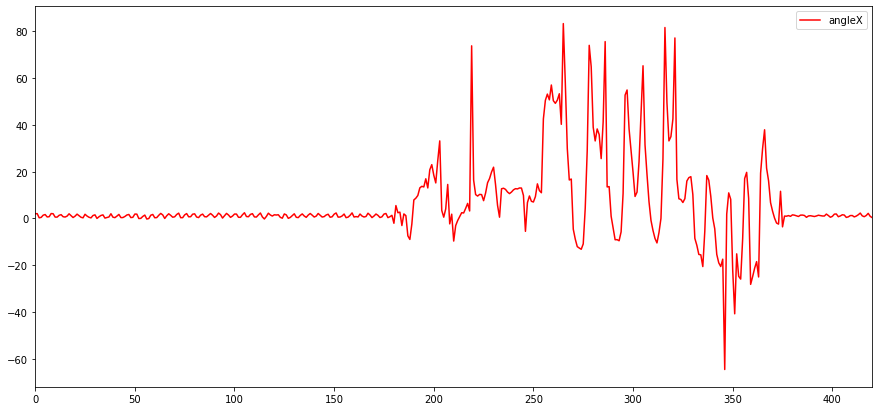

In [6]:
# graph accel roll x time
plt.figure(figsize=(15,7))
ax = plt.gca()

dataFrame.plot(kind='line', y='angleX', color = 'red', ax=ax)


#plt.xlabel('Time')
#plt.ylabel('angleX')
#plt.title('angleX x Time')
#plt.show()

"\nplt.xlabel('Time')\nplt.ylabel('cf_angleX')\nplt.title('cf_angleX x Time' )\nplt.show()\n"

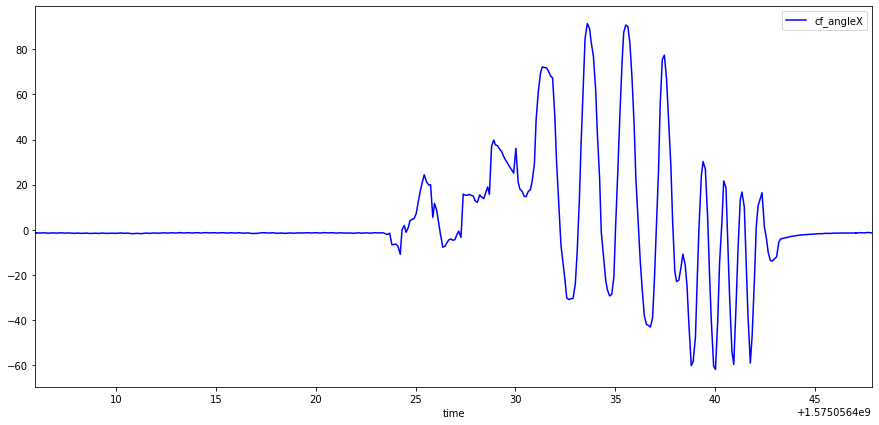

In [7]:
# graph filter roll x time
plt.figure(figsize=(15,7))
ax = plt.gca()
dataFrame.plot(kind='line',x='time', y='cf_angleX', color='blue', ax=ax)

"""
plt.xlabel('Time')
plt.ylabel('cf_angleX')
plt.title('cf_angleX x Time' )
plt.show()
"""

"\nplt.xlabel('Time')\nplt.ylabel('Angle X')\nplt.title('Angle X x Time' )\nplt.show()\n"

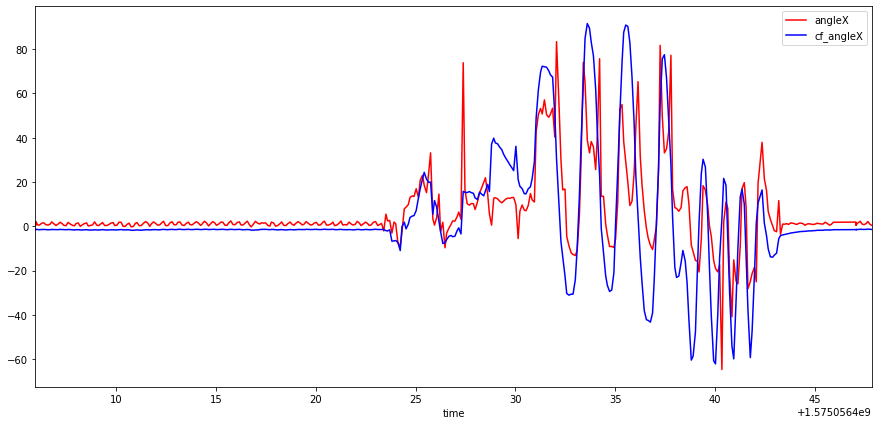

In [20]:
#graph roll values x time
plt.figure(figsize=(15,7))
ax = plt.gca()
dataFrame.plot(kind='line',x='time', y='angleX', color = 'red', ax=ax)
#dataFrame.plot(kind='line',x='time', y='gyro_angleX', color='green', ax=ax)
dataFrame.plot(kind='line',x='time', y='cf_angleX', color='blue', ax=ax)

"""
plt.xlabel('Time')
plt.ylabel('Angle X')
plt.title('Angle X x Time' )
plt.show()
"""

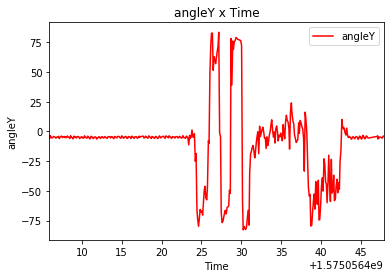

In [21]:
# graph accel pitch x time
ax = plt.gca()
dataFrame.plot(kind='line',x='time', y='angleY', color = 'red', ax=ax)
plt.xlabel('Time')
plt.ylabel('angleY')
plt.title('angleY x Time' )
plt.show()

Text(0.5, 1.0, 'Angle Y x Time')

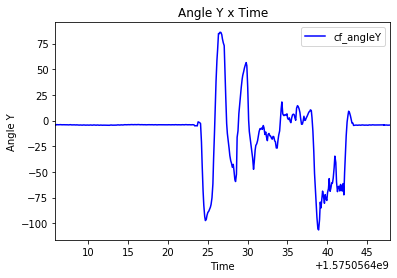

In [22]:
# graph filter roll x time
ax = plt.gca()
dataFrame.plot(kind='line',x='time', y='cf_angleY', color='blue', ax=ax)


plt.xlabel('Time')
plt.ylabel('Angle Y')

plt.title('Angle Y x Time' )
#plt.show()

Text(0.5, 1.0, 'Angle Y x Time')

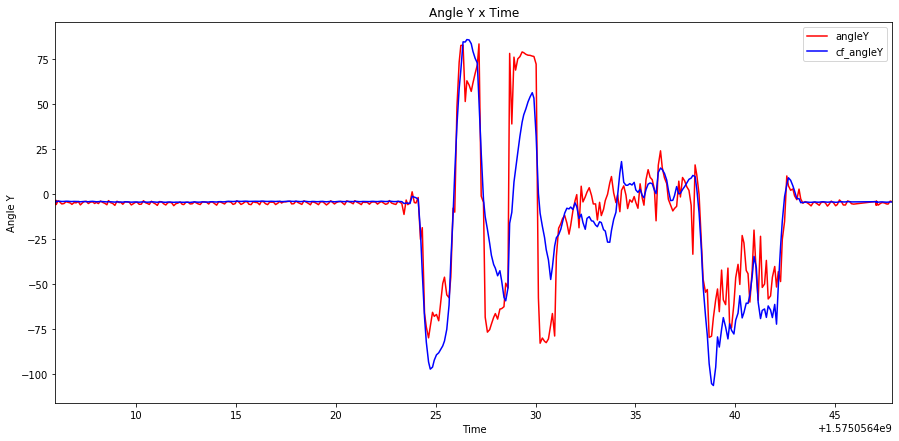

In [23]:
# graph roll values x time
plt.figure(figsize=(15,7))

ax = plt.gca()
dataFrame.plot(kind='line',x='time', y='angleY', color = 'red', ax=ax)
#dataFrame.plot(kind='line',x='time', y='gyro_angleY', color='green', ax=ax)
dataFrame.plot(kind='line',x='time', y='cf_angleY', color='blue', ax=ax)


plt.xlabel('Time')
plt.ylabel('Angle Y')
plt.title('Angle Y x Time' )
#plt.show()